In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [2]:
feature_table = pd.read_csv('/Users/arnoldtao/Documents/HoffmanLab/ClassWork/2019S_BME590_DataScience/dsah_final/feature_with_label.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 400
feature_table

,Chloride_max,Creatinine_max,Glucose_max,Hematocrit_max,Hemoglobin_max,Platelets_max,Potassium_max,Red blood cell count_max,Sodium_max,White blood cell count_max,Chloride_min,Creatinine_min,Glucose_min,Hematocrit_min,Hemoglobin_min,Platelets_min,Potassium_min,Red blood cell count_min,Sodium_min,White blood cell count_min,Chloride_mean,Creatinine_mean,Glucose_mean,Hematocrit_mean,Hemoglobin_mean,Platelets_mean,Potassium_mean,Red blood cell count_mean,Sodium_mean,White blood cell count_mean,Diastolic blood pressure_max,Glascow coma scale eye opening_max,Glascow coma scale motor response_max,Glascow coma scale verbal response_max,Heart Rate_max,Mean blood pressure_max,Oxygen saturation_max,Respiratory rate_max,Systolic blood pressure_max,Temperature_max,Diastolic blood pressure_min,Glascow coma scale eye opening_min,Glascow coma scale motor response_min,Glascow coma scale verbal response_min,Heart Rate_min,Mean blood pressure_min,Oxygen saturation_min,Respiratory rate_min,Systolic blood pressure_min,Temperature_min,Diastolic blood pressure_mean,Glascow coma scale eye opening_mean,Glascow coma scale motor response_mean,Glascow coma scale verbal response_mean,Heart Rate_mean,Mean blood pressure_mean,Oxygen saturation_mean,Respiratory rate_mean,Systolic blood pressure_mean,Temperature_mean,abnormal_lab_Alanine Aminotransferase (ALT),abnormal_lab_Albumin,abnormal_lab_Alkaline Phosphatase,abnormal_lab_Anion Gap,abnormal_lab_Asparate Aminotransferase (AST),abnormal_lab_Bands,abnormal_lab_Bicarbonate,"abnormal_lab_Bilirubin, Direct","abnormal_lab_Bilirubin, Total",abnormal_lab_CK-MB Index,"abnormal_lab_Calcium, Total","abnormal_lab_Calculated Bicarbonate, Whole Blood",abnormal_lab_Calculated Total CO2,abnormal_lab_Chloride,"abnormal_lab_Chloride, Whole Blood",abnormal_lab_Cortisol,abnormal_lab_Creatine Kinase (CK),"abnormal_lab_Creatine Kinase, MB Isoenzyme",abnormal_lab_Creatinine,abnormal_lab_D-Dimer,abnormal_lab_Eosinophils,"abnormal_lab_Fibrinogen, Functional",abnormal_lab_Free Calcium,abnormal_lab_Gentamicin,abnormal_lab_Glucose,abnormal_lab_Hematocrit,abnormal_lab_Hemoglobin,abnormal_lab_Hyaline Casts,abnormal_lab_INR(PT),abnormal_lab_Iron,"abnormal_lab_Iron Binding Capacity, Total",abnormal_lab_Lactate,abnormal_lab_Lactate Dehydrogenase (LD),abnormal_lab_Lymphocytes,abnormal_lab_MCH,abnormal_lab_MCHC,abnormal_lab_MCV,abnormal_lab_Magnesium,abnormal_lab_Metamyelocytes,abnormal_lab_Monocytes,abnormal_lab_Neutrophils,"abnormal_lab_Osmolality, Measured",abnormal_lab_PT,abnormal_lab_PTT,abnormal_lab_Phenytoin,abnormal_lab_Phosphate,abnormal_lab_Platelet Count,abnormal_lab_Potassium,"abnormal_lab_Potassium, Whole Blood",abnormal_lab_RBC,abnormal_lab_RDW,abnormal_lab_Red Blood Cells,abnormal_lab_Sodium,"abnormal_lab_Sodium, Whole Blood","abnormal_lab_Thyroxine (T4), Free",abnormal_lab_Transferrin,abnormal_lab_Troponin I,abnormal_lab_Troponin T,abnormal_lab_Urea Nitrogen,abnormal_lab_Urobilinogen,abnormal_lab_Vancomycin,abnormal_lab_WBC,abnormal_lab_White Blood Cells,abnormal_lab_pCO2,abnormal_lab_pH,abnormal_lab_pO2,Urine output_sum,HADM_ID,bin_num,is_female,insurance_Medicaid,insurance_Medicare,insurance_Private,ethnicity_ASIAN,ethnicity_ASIAN - CHINESE,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_MULTI RACE ETHNICITY,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_UNABLE TO OBTAIN,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,diag_count,ADDITIVE_drug,BASE_drug,MAIN_drug,label
0,108.000000,0.800000,160.000000,35.400000,12.400000,210.000000,2.9,3.800000,143.000000,10.600000,108.000000,0.800000,160.00000,35.400000,12.400000,210.000000,2.9,3.800000,143.000000,10.600000,108.000000,0.800000,160.000000,35.400000,12.400000,210.000000,2.900000,3.800000,143.000000,10.600000,63.0,1.000000,4.000000,1.000000,84.0,89.000000,100.000000,24.0,147.0,97.000000,47.0,1.000000,4.000000,1.000000,69.0,64.000000,100.000000,0.0,105.0,97.000000,54.000000,1.000000,4.000000,1.000000,77.666667,76.000000,100.000000,14.000000,131.800000,97.000000,0.0,0.0,0.0,0.0,0.0,

In [4]:
filter_col = [col for col in feature_table if col.startswith('abnormal')]
filter_col
abnormal_feature_table = feature_table[filter_col]
abnormal_feature_table

,abnormal_lab_Alanine Aminotransferase (ALT),abnormal_lab_Albumin,abnormal_lab_Alkaline Phosphatase,abnormal_lab_Anion Gap,abnormal_lab_Asparate Aminotransferase (AST),abnormal_lab_Bands,abnormal_lab_Bicarbonate,"abnormal_lab_Bilirubin, Direct","abnormal_lab_Bilirubin, Total",abnormal_lab_CK-MB Index,"abnormal_lab_Calcium, Total","abnormal_lab_Calculated Bicarbonate, Whole Blood",abnormal_lab_Calculated Total CO2,abnormal_lab_Chloride,"abnormal_lab_Chloride, Whole Blood",abnormal_lab_Cortisol,abnormal_lab_Creatine Kinase (CK),"abnormal_lab_Creatine Kinase, MB Isoenzyme",abnormal_lab_Creatinine,abnormal_lab_D-Dimer,abnormal_lab_Eosinophils,"abnormal_lab_Fibrinogen, Functional",abnormal_lab_Free Calcium,abnormal_lab_Gentamicin,abnormal_lab_Glucose,abnormal_lab_Hematocrit,abnormal_lab_Hemoglobin,abnormal_lab_Hyaline Casts,abnormal_lab_INR(PT),abnormal_lab_Iron,"abnormal_lab_Iron Binding Capacity, Total",abnormal_lab_Lactate,abnormal_lab_Lactate Dehydrogenase (LD),abnormal_lab_Lymphocytes,abnormal_lab_MCH,abnormal_lab_MCHC,abnormal_lab_MCV,abnormal_lab_Magnesium,abnormal_lab_Metamyelocytes,abnormal_lab_Monocytes,abnormal_lab_Neutrophils,"abnormal_lab_Osmolality, Measured",abnormal_lab_PT,abnormal_lab_PTT,abnormal_lab_Phenytoin,abnormal_lab_Phosphate,abnormal_lab_Platelet Count,abnormal_lab_Potassium,"abnormal_lab_Potassium, Whole Blood",abnormal_lab_RBC,abnormal_lab_RDW,abnormal_lab_Red Blood Cells,abnormal_lab_Sodium,"abnormal_lab_Sodium, Whole Blood","abnormal_lab_Thyroxine (T4), Free",abnormal_lab_Transferrin,abnormal_lab_Troponin I,abnormal_lab_Troponin T,abnormal_lab_Urea Nitrogen,abnormal_lab_Urobilinogen,abnormal_lab_Vancomycin,abnormal_lab_WBC,abnormal_lab_White Blood Cells,abnormal_lab_pCO2,abnormal_lab_pH,abnormal_lab_pO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,1.0,4.0
2,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,2.0,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,6.0,3.0,3.0,0.0,2.0,0.0,0.0,6.0,0.0,1.0,3.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0
8,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,

In [5]:
feature_table_subset = feature_table.iloc[:,[1,6,8,12,17,18,30,46,50,51,61,75,\
                                             79,90,99,100,103,104,105,106,107,115,\
                                             118,120,122,127,128,129,131,133]]

In [6]:
feature_table_subset

,Creatinine_max,Potassium_max,Sodium_max,Glucose_min,Red blood cell count_min,Sodium_min,Diastolic blood pressure_max,Oxygen saturation_min,Diastolic blood pressure_mean,Glascow coma scale eye opening_mean,abnormal_lab_Albumin,abnormal_lab_Cortisol,abnormal_lab_D-Dimer,"abnormal_lab_Iron Binding Capacity, Total",abnormal_lab_Monocytes,abnormal_lab_Neutrophils,abnormal_lab_PTT,abnormal_lab_Phenytoin,abnormal_lab_Phosphate,abnormal_lab_Platelet Count,abnormal_lab_Potassium,abnormal_lab_Transferrin,abnormal_lab_Urea Nitrogen,abnormal_lab_Vancomycin,abnormal_lab_White Blood Cells,HADM_ID,bin_num,is_female,insurance_Medicare,ethnicity_ASIAN
0,0.800000,2.9,143.000000,160.00000,3.800000,143.000000,63.0,100.000000,54.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,102390,1,1,1,1
1,0.700000,3.3,148.000000,157.00000,3.020000,140.000000,65.0,100.000000,54.288462,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,102390,2,1,1,1
2,0.600000,4.0,144.000000,126.00000,2.660000,143.000000,76.0,96.000000,60.551020,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,102390,3,1,1,1
3,0.900000,4.7,140.000000,124.00000,2.600000,139.000000,79.0,93.000000,57.000000,3.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,105348,1,1,0,0
4,0.700000,4.3,137.000000,84.00000,1.900000,135.000000,63.0,97.000000,54.066667,3.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,105348,2,1,0,0
5,0.500000,4.0,140.000000,97.00000,3.180000,140.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105348,3,1,0,0
6,0.500000,4.0,139.000000,117.00000,3.300000,139.000000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105348,4,1,0,0
7,3.700000,5.0,135.000000,133.00000,3.580000,130.000000,85.0,77.000000,50.833333,3.000000,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,6.0,0.0,2.0,116543,1,0,1,0
8,4.700000,5.5,130.000000,114.00000,3.960000,129.000000,64.0,95.000000,47.046512,2.800000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,3.0,0.0,1.0,116543,2,0,1,0
9,1.100000,4.0,143.000000,112.00000,4.230000,143.000000,100.0,93.000000,67.285714,3.600000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117382,1,0,1,0


In [7]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(feature_table.values)
model_matrix = imr.transform(feature_table.values)
outcome=feature_table['label']

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(
    model_matrix,outcome, test_size=0.2, random_state=42)
print(X_train,"xtest",X_test,"y_train",y_train,"y_test",y_test)

[[ 97.           3.4        220.         ...  32.          79.
    0.        ]
 [103.           0.9        113.         ...   9.          80.
    0.        ]
 [105.           1.1        137.         ...  11.          46.
    0.        ]
 ...
 [ 97.           2.2        174.         ...  32.          79.
    0.        ]
 [111.           1.2        100.         ...  14.          96.
    0.        ]
 [106.37477053   1.68687515 162.13882202 ...   0.           1.
    0.        ]] xtest [[119.    0.8 164.  ...  19.   55.    0. ]
 [107.    1.6 162.  ...  19.  121.    0. ]
 [112.    1.8 149.  ...  15.   87.    0. ]
 ...
 [109.    1.7 128.  ...  32.   69.    0. ]
 [119.    1.8 154.  ...  21.   39.    0. ]
 [107.    0.7 113.  ...  11.   62.    0. ]] y_train 16     0
18     0
10     0
111    0
101    0
94     0
51     0
45     0
82     0
136    0
65     0
0      0
55     0
28     0
40     0
24     1
93     0
126    0
112    0
64     0
44     0
15     0
89     0
39     0
22     0
105    0
76     0

In [9]:
#feature normalization [scale from 0-1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [10]:
#feature normalization, using standard scaler, centered at 0
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [11]:
#sequential backward selection SBS -> reduce the dimensionality of the initial feature subspace 
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X,y):
        X_train,X_test, y_train, y_test = \
                   train_test_split(X, y, test_size=self.test_size,
                                    random_state=self.random_state)
        dim=X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test,indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [12]:
#try the SBS implementation using the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs=SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)


In [13]:
sbs.scores_

[0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714

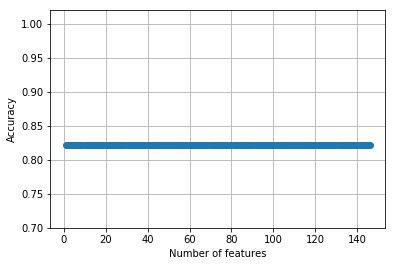

In [14]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [15]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X_train, y_train = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
reg.score(X_train, y_train) 


0.9993566905623871

In [18]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[0])

ValueError: The underlying estimator RandomForestClassifier has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

In [ ]:
#clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X_train, y_train)

In [17]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = feature_table.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')    
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])

ValueError: Unknown label type: 'continuous'